# Extension Activities

Here, we list a couple of extension activities to further use the concepts covered in Prof. Margutti's lectures. Some of these exercises are optional, because they involve installing additional software and thus may not work for all participants.

## 1) Basic Light Curve Analysis

In our previous activity, we learned how to extract an X-ray count rate from Chandra data. Here, we will take a closer look at a compilation of flux density measurements extracted from observations of GW170817 and perform some basic calculations using this data. We also provide a couple of optional extra activities for students desiring to further explore data analysis relevant for multi-messenger science.

All of the data for this activity is contained in the file GW170817_data.txt. Let's start by reading in this file and taking a look at the X-ray light curve:

Text(0, 0.5, 'Flux density (mJy)')

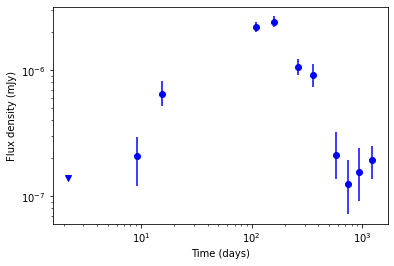

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import astropy
import astropy.io.ascii as ascii

data = ascii.read('GW170817_data.txt')

# split out the X-ray light curve
xrays = data[data['Freq_Hz'] == 2.42E+17]
xray_dets = xrays[xrays['Det_Nondet']==1]

plt.figure()
plt.errorbar(xray_dets['Time_sec']/(3600*24),xray_dets['Flux_mJy'],yerr=[-1*xray_dets['FluxErrN_mJy'],xray_dets['FluxErrP_mJy']],fmt='bo')
plt.plot(xrays['Time_sec'][0]/(3600*24),xrays['Flux_mJy'][0],'bv')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Time (days)')
plt.ylabel('Flux density (mJy)')

Note that the X-ray observation we reduced earlier was taken $\sim160$ days after GW170817 was discovered, so it is near the peak of this light curve!

Now, see if you can create a similar plot showing the radio light curve at 3 GHz. Note that the radio data have symmetric errors (unlike the X-ray data above), so the plotting command should only use the errors in the FluxErrP_mJy column of the data file.

Text(0, 0.5, 'Flux density (mJy)')

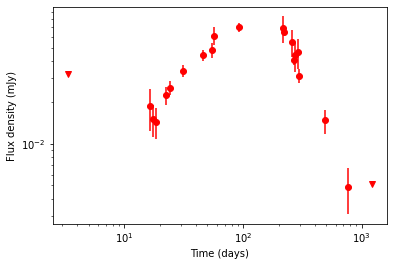

In [40]:
# Students to fill this in. Example solution:
radio_3GHz = data[data['Freq_Hz'] == 3.0E+9]

det_3GHz = radio_3GHz[radio_3GHz['Det_Nondet']==1]
ndet_3GHz = radio_3GHz[radio_3GHz['Det_Nondet']==0]

plt.figure()
plt.errorbar(det_3GHz['Time_sec']/(3600*24),det_3GHz['Flux_mJy'],yerr=det_3GHz['FluxErrP_mJy'],fmt='ro') 
plt.loglog(ndet_3GHz['Time_sec']/(3600*24),ndet_3GHz['Flux_mJy'],'rv')
plt.xlabel('Time (days)')
plt.ylabel('Flux density (mJy)')

Note that both light curves have the same simple shape: the flux density can be described as a broken power law in time, rising to a peak around 200 days post-discovery and then rapidly declining. This behavior is characteristic of __synchrotron radiation__ (see e.g. Granot & Sari 2002). When two neutron stars collide, a jet of material is launched at high speed by the merger. As this jet slams into the external medium, a shock is created, enhancing magnetic fields and accelerating electrons into a power-law distribution of energies, $N(E) \propto E^{-p}$. The observed value of $p$ tests our understanding of particle acceleration in shocks. Other important parameters that can be determined by fitting a synchrotron emission model to the observations include the jet energy, the density of the ambient medium, and the fractions of energy carried by electrons and by magnetic fields. For an on-axis observer (i.e. an observer looking straight down the jet), this problem can be solved analytically. For an off-axis observer, the geometry is more complicated (this is the situation for GW170817). Relativistically-moving material is initially Doppler beamed away from the observer, so the jet initially appears much fainter than it would on-axis. As the jet decelerates, the relativistic beaming effect reduces and the jet becomes brighter. While a complete understanding requires numerical simulations, we can nevertheless obtain some key insights from some basic analytic calculations.

We will use the 3 GHz radio light curve for our model fitting, as it is the best-sampled. Fit a broken power law to the dataset you plotted above.

Parameter('alpha_1', value=-0.8807742597263386) Parameter('alpha_2', value=2.6463327640620853)


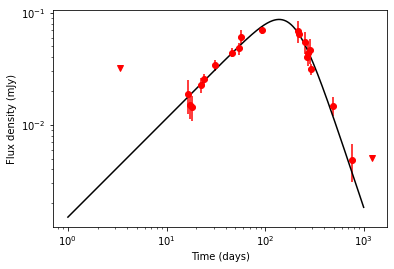

In [70]:
# Students to fill this in. Sample answer:
from astropy.modeling import models, fitting

bpl = models.SmoothlyBrokenPowerLaw1D()
fit = fitting.LevMarLSQFitter()

bpl_fit = fit(bpl,det_3GHz['Time_sec']/(3600*24),det_3GHz['Flux_mJy'])

x=np.arange(1,1000,1)

plt.figure()
plt.errorbar(det_3GHz['Time_sec']/(3600*24),det_3GHz['Flux_mJy'],yerr=det_3GHz['FluxErrP_mJy'],fmt='ro') 
plt.loglog(ndet_3GHz['Time_sec']/(3600*24),ndet_3GHz['Flux_mJy'],'rv')
plt.loglog(x,bpl_fit(x),'k-')
plt.xlabel('Time (days)')
plt.ylabel('Flux density (mJy)')

print(bpl_fit.alpha_1, bpl_fit.alpha_2) # careful of negative signs: SmoothlyBrokenPowerLaw1D defines alpha1 as F~t^-alpha1

Before the time of peak flux, the light curve from a __uniform__ or __top-hat jet__ (i.e. a narrow cone of relativistic material all moving exactly the same speed with sharp edges) is expected to rise as $\sim t^3$ (Granot et al. 2002). How does this compare to the value you found? Why do you think this is?

(Answer: The students should have found a much shallower rise ($\sim t^{-0.9}$). This is because GW170817's jet is not uniform, but instead has some angular structure; an ultra-relativistic core is surrounded by slower-moving material. This slower moving material comes into an off-axis observer's line of sight first, so the light curve appears to rise more slowly.)

After the time of peak flux, the light curve is expected to decline as $\sim t^{-p}$. Based on your fit, what is $p$ for GW170817? How does the value from your fit compare to the theoretically expected value derived from numerical simulations ($p\approx2.2$)?

## 2) Further synchrotron modeling with JetFit (optional)

The simple analytic calculations we completed above are useful, but numerical simulations of relativistic jets can provide additional insights (into e.g. the jet structure). One easy-to-use code is JetFit (Wu & MacFadyen 2018). JetFit can be downloaded here: https://github.com/NYU-CAL/JetFit. Their Example_Fitter.py file applies the code to a subset of the GW170817 dataset that we looked at above. Try playing around with the code, to see the effect of varying different model parameters. Can you try updating the fits in Wu & MacFadyen (2018) using the more complete dataset we provided?

## 3) Continued X-ray data analysis (optional)

In the hands-on session, we learned how to extract an X-ray count rate from Chandra data. Here, you may choose to explore another tutorial that explains how to convert this count rate to an X-ray flux that can be used for science. This exercise will use observations of a nearby supernova, SN 2014C, which was bright in X-rays. The instructions for this tutorial can be found in the pdf included in this folder.

Note: you will need to install the xspec software. Instructions for doing so are here: https://heasarc.gsfc.nasa.gov/lheasoft/